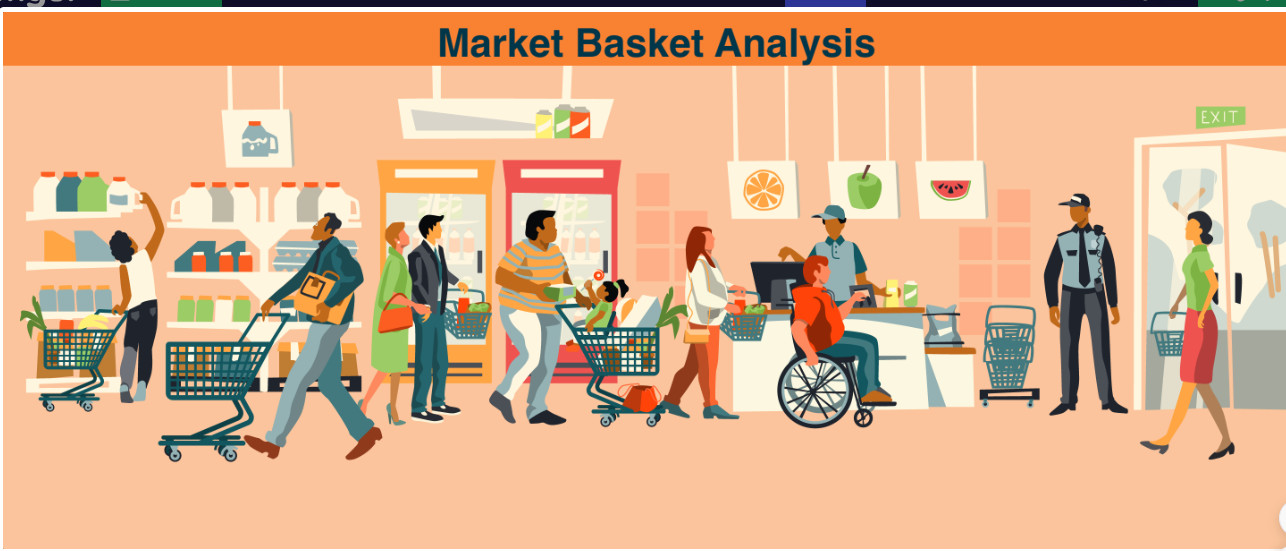

In [8]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import association_rules,apriori 
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 12

# DATA PREPROCESSING 

In [37]:
dataset = pd.read_csv('C:\\Users\\user\\Downloads\\Market_Basket_Optimisation.csv',header=None,
                     index_col=None)
dataset.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# CONVERTING EACH TRANSASCTION TO IN THE FORM OF AN INDVIDUAL LIST
transactions = dataset.apply(lambda x: x.dropna().tolist(), axis=1).tolist()
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [54]:
# TRANSACTION  Encoding 
from mlxtend.preprocessing import TransactionEncoder
encoder = TransactionEncoder()
encoded_dataset = encoder.fit(transactions).transform(transactions)

In [45]:
df = pd.DataFrame(encoded_dataset, columns=encoder.columns_)

In [51]:
df.sample(5)

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
5456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
946,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3302,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4109,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5920,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# ASSOCIATION MEASURES IMPLIMENTATION 

In [106]:
# IMPLIMENTING SUPPORT
support_data = apriori(df,min_support=0.05,use_colnames=True) # this will help us get the support of 5% threshold wich 5% of the itemset in aparticular transactio
support_data

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


In [116]:
 # get the confidence with threshold of 5 % from the previous support table
rules = association_rules(support_data,metric="confidence",min_threshold=0.05)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
2,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
3,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
5,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437


In [114]:
 association_rules(support_data,metric="lift",min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
2,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
3,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437


In [118]:
rules['lift'] = rules['confidence'] / rules['consequents'].apply(lambda x: support_data.loc[support_data['itemsets'] == x, 'support'].values[0])
# Display the rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

       antecedents      consequents   support  confidence      lift
0  (mineral water)      (chocolate)  0.052660    0.220917  1.348332
1      (chocolate)  (mineral water)  0.052660    0.321400  1.348332
2  (mineral water)           (eggs)  0.050927    0.213647  1.188845
3           (eggs)  (mineral water)  0.050927    0.283383  1.188845
4  (mineral water)      (spaghetti)  0.059725    0.250559  1.439085
5      (spaghetti)  (mineral water)  0.059725    0.343032  1.439085
